In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv"
df = pd.read_csv(url)

df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


(None,
        Unnamed: 0          TV       radio   newspaper       sales
 count  200.000000  200.000000  200.000000  200.000000  200.000000
 mean   100.500000  147.042500   23.264000   30.554000   14.022500
 std     57.879185   85.854236   14.846809   21.778621    5.217457
 min      1.000000    0.700000    0.000000    0.300000    1.600000
 25%     50.750000   74.375000    9.975000   12.750000   10.375000
 50%    100.500000  149.750000   22.900000   25.750000   12.900000
 75%    150.250000  218.825000   36.525000   45.100000   17.400000
 max    200.000000  296.400000   49.600000  114.000000   27.000000)

In [4]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [5]:
if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])

df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


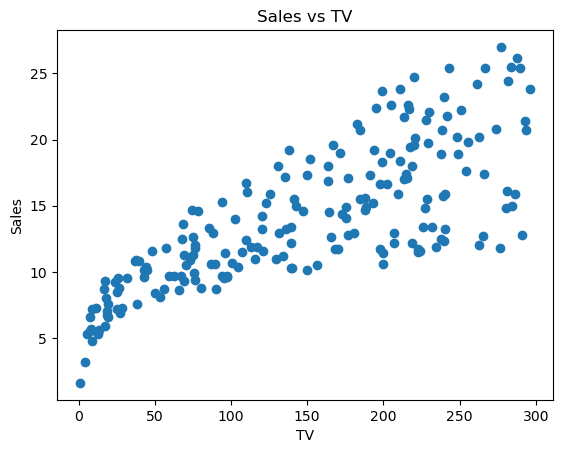

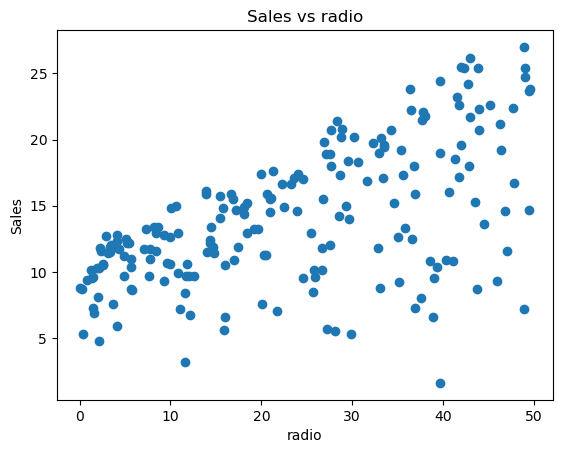

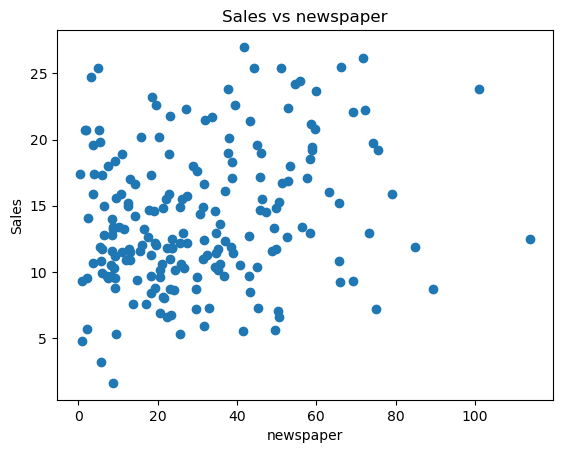

In [7]:
predictors = ["TV", "radio", "newspaper"]

for x in predictors:
    plt.figure()
    plt.scatter(df[x], df["sales"])
    plt.xlabel(x)
    plt.ylabel("Sales")
    plt.title(f"Sales vs {x}")
    plt.show()

## Exploratory Data Analysis
From the scatter plots:
- **TV vs Sales:** There is a strong positive linear relationship. As TV advertising increases, Sales generally increase.
- **Radio vs Sales:** There is also a positive relationship, strong but slightly weaker than TV.
- **Newspaper vs Sales:** The relationship appears weak and scattered, suggesting Newspaper may not be a strong predictor of Sales.

Overall, the plots suggest **TV and Radio** are likely important predictors, while **Newspaper** may contribute little.

In [8]:
df.corr(numeric_only=True)

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


## Correlation Analysis
The correlation matrix supports the EDA results: **TV** and **Radio** show stronger correlations with Sales, while **Newspaper** has a weaker correlation, reinforcing the decision to remove it during model selection.

In [9]:
model_full = smf.ols("sales ~ TV + radio + newspaper", data=df).fit()
model_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 15 Feb 2026   Prob (F-statistic):           1.58e-96
Time:                        22:00:23   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multiple Linear Regression
The regression coefficients show:
- **TV** has a positive estimated coefficient and is statistically significant, indicating that increasing TV advertising increases expected Sales, holding other variables constant.
- **Radio** also has a positive and statistically significant coefficient, meaning higher Radio advertising is associated with higher Sales.
- **Newspaper** has a small and statistically insignificant coefficient, suggesting that it does not meaningfully predict Sales once TV and Radio are included in the model.

## Global F-test and R²
- The **global F-test** is significant (p-value < 0.05), meaning the model with predictors explains Sales better than an intercept-only model. In other words, **at least one predictor is associated with Sales**.
- The **R²** value is high, meaning a large portion of the variability in Sales is explained by the advertising predictors.

In [10]:
coef_table = pd.DataFrame({
    "Estimate": model_full.params,
    "StdError": model_full.bse,
    "t": model_full.tvalues,
    "p_value": model_full.pvalues
})
coef_table

,Estimate,StdError,t,p_value
Intercept,2.938889,0.311908,9.422288,1.267295e-17
TV,0.045765,0.001395,32.808624,1.509960e-81
radio,0.188530,0.008611,21.893496,1.505339e-54
newspaper,-0.001037,0.005871,-0.176715,8.599151e-01


## Coefficient Table
The coefficient table confirms the regression summary results: **TV** and **Radio** are statistically significant predictors of Sales, while **Newspaper** is not statistically significant.

In [11]:
model_reduced = smf.ols("sales ~ TV + radio", data=df).fit()
model_reduced.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sun, 15 Feb 2026   Prob (F-statistic):           4.83e-98
Time:                        22:00:32   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model Selection
Since **Newspaper** is not significant and adds little explanatory value, it is removed.
A reduced model using only **TV and Radio** performs nearly the same as the full model (similar fit), showing there is **no meaningful loss** by removing Newspaper.

In [12]:
sm.stats.anova_lm(model_reduced, model_full)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,197.0,556.913980,0.0,NaN,NaN,NaN
1,196.0,556.825263,1.0,0.088717,0.031228,0.859915


## Model Comparison
The ANOVA comparison shows that removing **Newspaper** does not significantly reduce model fit. Therefore, the reduced model provides a comparable explanation of Sales while being simpler and more interpretable.

## Final Conclusion
Sales are best explained by **TV and Radio advertising**. TV has the strongest influence, Radio is also important, and Newspaper does not contribute meaningfully once TV and Radio are included. Therefore, the **reduced model (TV + Radio)** is preferable because it is simpler and performs just as well.

In [13]:
comparison = pd.DataFrame({
    "Model": ["Reduced (TV+Radio)", "Full (TV+Radio+Newspaper)"],
    "Adj_R2": [model_reduced.rsquared_adj, model_full.rsquared_adj],
    "AIC": [model_reduced.aic, model_full.aic],
    "BIC": [model_reduced.bic, model_full.bic]
})
comparison

,Model,Adj_R2,AIC,BIC
0,Reduced (TV+Radio),0.896151,778.394099,788.289051
1,Full (TV+Radio+Newspaper),0.895637,780.362236,793.555505


# Exercise 2: Multiple Linear Regression Using a Kaggle Dataset (Insurance Data)

In [24]:
import pandas as pd

insurance = pd.read_csv("insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Dataset Description
This dataset contains individual information (e.g., age, BMI, children, sex, smoker, region) and the corresponding **medical insurance charges**.
- **Response variable:** charges
- **Predictors:** age, bmi, children, sex, smoker, region (with categorical variables converted to dummy variables)



In [25]:
insurance.info()
insurance.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [26]:
insurance_dum = pd.get_dummies(
    insurance,
    columns=["sex", "smoker", "region"],
    drop_first=True
)

insurance_dum.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


## Dummy Variables
Categorical variables (such as **sex**, **smoker**, and **region**) were transformed into dummy variables so they can be included in the regression model.
One category is treated as the **reference group**, and each dummy coefficient represents the difference from that reference (while holding other variables constant).

In [27]:
import statsmodels.formula.api as smf

model_full = smf.ols(
    "charges ~ age + bmi + children + sex_male + smoker_yes + region_northwest + region_southeast + region_southwest",
    data=insurance_dum
).fit()

model_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Sun, 15 Feb 2026   Prob (F-statistic):               0.00
Time:                        22:13:07   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.194e+04    987.819    -12.086      0.000   -1.39e+04      -1e+04
sex_male[T.True]          -131.3144    332.945     -0.394      0.693    -784.470     521.842
smoker_yes[T.True]        2.385e+04    413.153     57.723      0.000     2.3e+04    2.47e+04
region_northwest[T.True]  -352.9639    476.276     -0.741      0.459   -1287.298     581.370
region_southeast[T.True] -1035.0220    478.692     -2.162      0.031   -1974.097     -95.947
region_southwest[T.True]  -960.0510    477.933     -2.009      0.045   -1897.636     -22.466
age                        256.8564     11.899     21.587      0.000     233.514     280.199
bmi                        339.1935     28.599     11.860      0.000     283.088     395.298
children                   475.5005    137.804      3.451      0.001     205.163     745.838
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                         311.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multiple Linear Regression Results
From the regression output:
- **Smoker status** is one of the strongest predictors and is statistically significant. Being a smoker increases expected medical charges substantially.
- **Age** is statistically significant and positive: older individuals tend to have higher charges.
- **BMI** is statistically significant and positive: higher BMI is associated with higher charges.
- Some categorical predictors (depending on output) may not be significant, meaning they do not strongly affect charges after controlling for the major predictors.


In [28]:
model_reduced = smf.ols(
    "charges ~ age + bmi + children + smoker_yes + region_southeast + region_southwest",
    data=insurance_dum
).fit()

model_reduced.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.3
Date:                Sun, 15 Feb 2026   Prob (F-statistic):               0.00
Time:                        22:13:09   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.217e+04    949.538    -12.812      0.000    -1.4e+04   -1.03e+04
smoker_yes[T.True]        2.384e+04    411.659     57.921      0.000     2.3e+04    2.47e+04
region_southeast[T.True]  -858.4696    415.206     -2.068      0.039   -1672.998     -43.941
region_southwest[T.True]  -782.7452    413.756     -1.892      0.059   -1594.430      28.940
age                        257.0064     11.889     21.617      0.000     233.683     280.330
bmi                        338.6413     28.554     11.860      0.000     282.625     394.657
children                   471.5441    137.656      3.426      0.001     201.498     741.590
==============================================================================
Omnibus:                      300.125   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              716.587
Skew:                           1.211   Prob(JB):                    2.48e-156
Kurtosis:                       5.643   Cond. No.                         295.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model Selection
Non-significant predictors can be removed to build a simpler reduced model while keeping important predictors like **smoker, age, and BMI**.
If model comparison shows little change in R² (or no significant ANOVA difference), the reduced model is preferred because it is simpler and easier to interpret.


## Conclusion
Insurance charges are primarily driven by **smoking status**, followed by **age** and **BMI**. A reduced model focusing on these key predictors is typically preferable because it explains the data well without unnecessary variables.